<a href="https://colab.research.google.com/github/SheikhSarvar/Airbnb-Analysis/blob/main/Self_Project_Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV/Copy of CAR DETAILS FROM CAR DEKHO.csv')
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [ ]:
df.shape

(4340, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
df.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


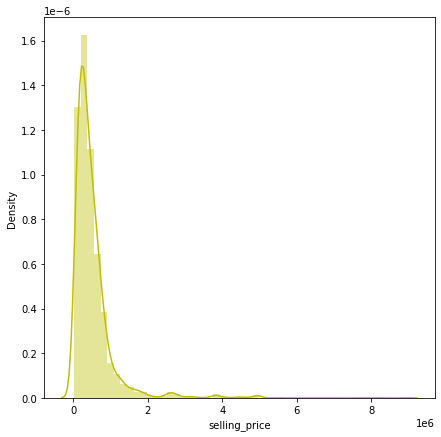

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['selling_price'],color="y")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


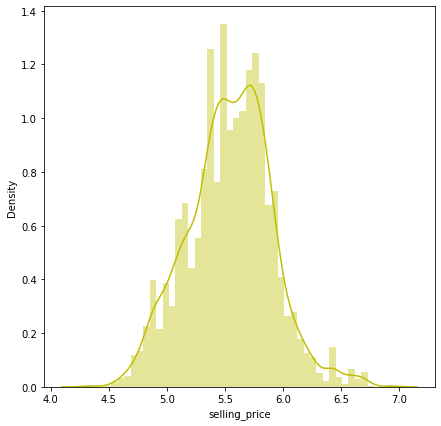

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['selling_price']),color="y")

In [ ]:
dependent_veriable=df['selling_price']
dependent_veriable

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['year', 'selling_price', 'km_driven'], dtype='object')

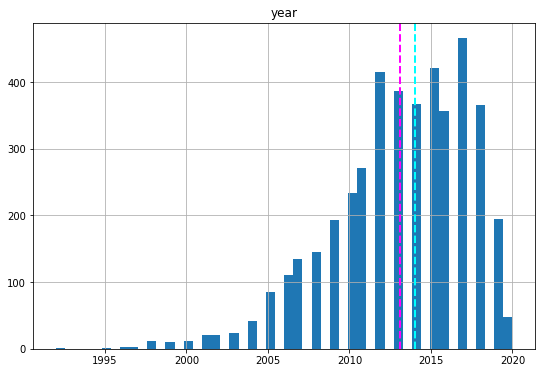

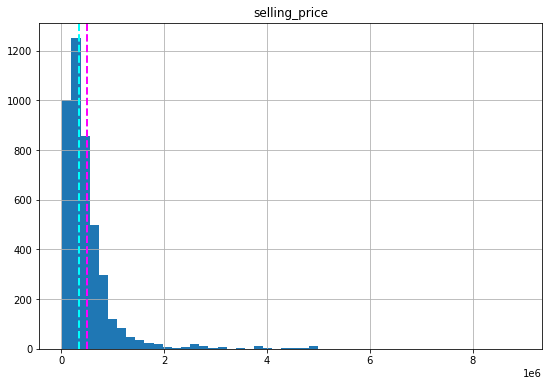

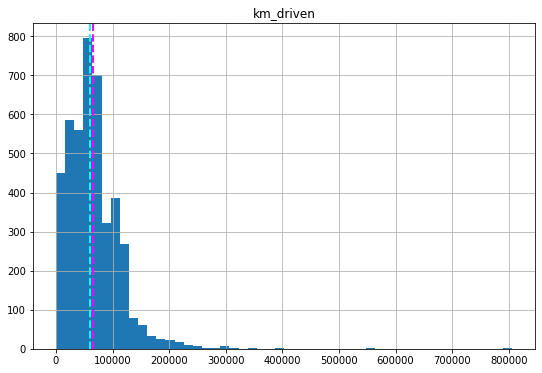

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

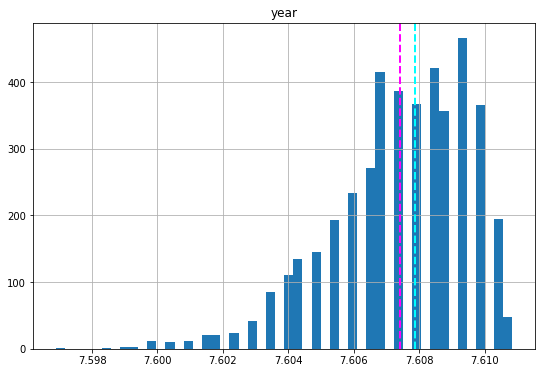

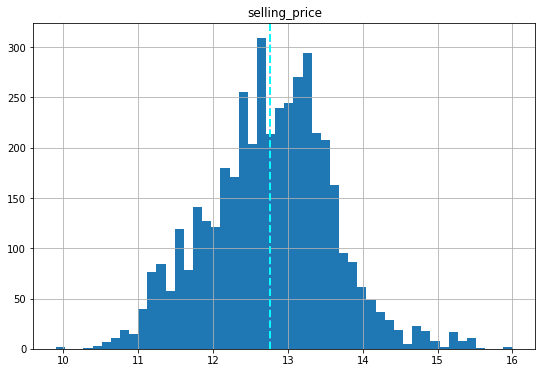

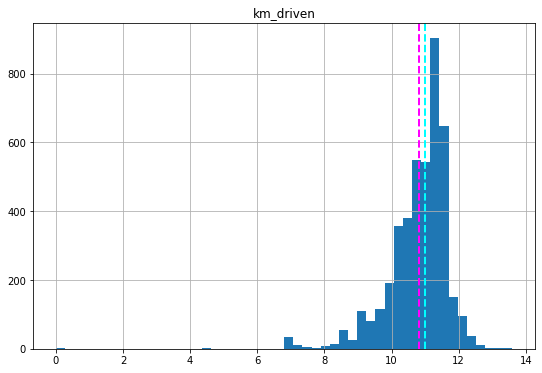

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature =np.log(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

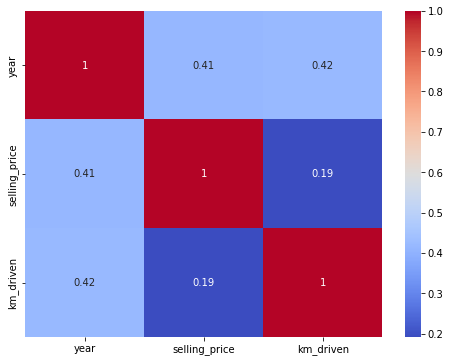

In [ ]:
plt.figure(figsize=(8,6))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

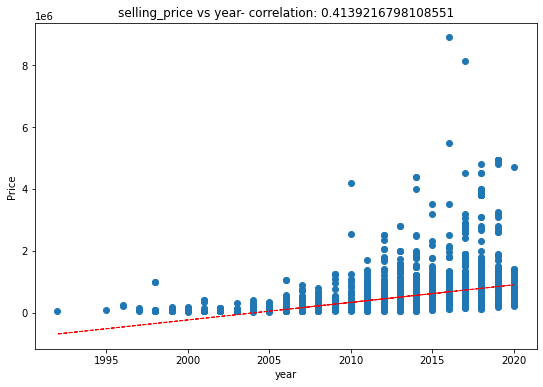

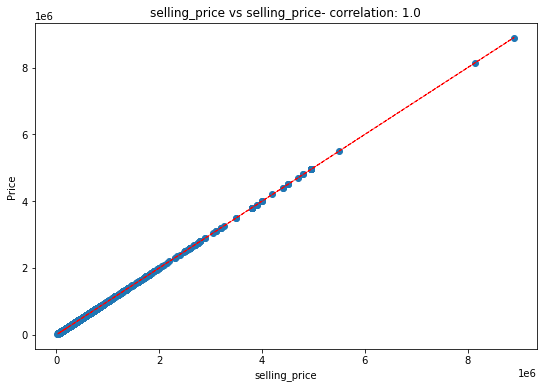

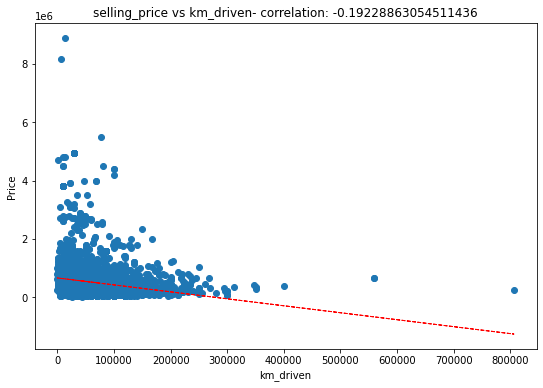

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['selling_price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Price')
    ax.set_title('selling_price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['selling_price'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

In [23]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'selling_price' as response variable 
y, X = dmatrices('selling_price ~km_driven+fuel+seller_type+transmission+owner+year ', data=df, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,358329.495407,Intercept
1,27.778245,fuel[T.Diesel]
2,1.029590,fuel[T.Electric]
3,1.572106,fuel[T.LPG]
4,27.809674,fuel[T.Petrol]
5,1.225214,seller_type[T.Individual]
6,1.084702,seller_type[T.Trustmark Dealer]
7,1.072594,transmission[T.Manual]
8,1.088381,owner[T.Fourth & Above Owner]
9,1.262768,owner[T.Second Owner]


In [24]:
df_copy = df.copy()

In [25]:
lst = (df_copy.dtypes == 'object')
object_col = list(lst[lst].index)
print(object_col)

['name', 'fuel', 'seller_type', 'transmission', 'owner']


In [27]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in object_col:
    df_copy[col] = encoder.fit_transform(df_copy[col])

In [28]:
attributes = ['name','year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner']
X = df_copy[attributes]
y = df_copy.selling_price

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.6, random_state = 0)

In [30]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

print(regressor.intercept_)
print(regressor.coef_)

-71630869.5998968
[-6.00776026e+01  3.63947020e+04 -6.56700224e-01 -9.93829283e+04
 -3.59802631e+04 -8.44508278e+05 -2.26649579e+04]


In [31]:
y_pred = regressor.predict(X_valid)
print(y_pred)
print(y_valid)

[1418211.91519162 1475445.81355438  165184.46647392 ...  512633.08892444
  492126.94509387  711928.31774759]
2089     465000
1077    1580000
1495     150000
555     4950000
2615     125000
         ...   
4022     200000
2053     150000
55       401000
3462     300000
1677     500000
Name: selling_price, Length: 2604, dtype: int64


In [32]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_valid, y_pred))

232703.1159419237


In [33]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_leaf_nodes = 700, random_state = 0)
tree.fit(X_train,y_train)
tree_y_pred = tree.predict(X_valid)
tree_y_pred
print(mean_absolute_error(y_valid,tree_y_pred))

157809.3256210978


In [34]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=1)
forest.fit(X_train, y_train)
forest_y = forest.predict(X_valid)
print(mean_absolute_error(y_valid, forest_y))

124937.86532712038


In [ ]:
#linear regression 

In [37]:
attributes = ['name','year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner']
x = df_copy[attributes]
y = df_copy.selling_price

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [45]:
from sklearn.linear_model import LinearRegression
l=LinearRegression()

In [46]:
l.fit(x_train,y_train)

LinearRegression()

In [47]:
y_pred=l.predict(x_test)

In [49]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred)) 

0.4239750167759101
250868728486.2255


In [52]:
from sklearn.linear_model import Ridge
r=Ridge(alpha=0.0001)

In [53]:
r.fit(x_train,y_train)

Ridge(alpha=0.0001)

In [56]:
y_pred1=r.predict(x_test)

In [57]:
print(r2_score(y_test,y_pred1))
print(mean_squared_error(y_test,y_pred1)) 

0.4239749985071921
250868736442.5645


In [59]:
from sklearn.linear_model import Lasso
L=Lasso(alpha=0.0001)
L.fit(x_train,y_train)
y_pred2=L.predict(x_test)
print(r2_score(y_test,y_pred2))
print(mean_squared_error(y_test,y_pred2)) 

0.42397501670339455
250868728517.80725


In conclusion,

Linear Regression Model predicted prices with a mean error of 


Decision Tree Model predicted prices with a mean error of 


Random Forest Regressor Model predicted prices with a mean error of



Ridge Regression Model predicted prices with a mean error of


Lasoo Regression Model predicted prices with a mean error of